In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# df = pd.read_csv("historicos/modificados/bitcoin_modificado.csv")
df = pd.read_csv("historicos/modificados/Polkadot_modificado.csv")
df

,Symbol,Date,High,Low,Open,Close
0,DOT,2020-08-21,3.09,2.73,2.90,2.88
1,DOT,2020-08-22,4.51,2.82,2.88,4.48
2,DOT,2020-08-23,4.49,3.72,4.49,3.97
3,DOT,2020-08-24,4.78,3.81,3.99,4.60
4,DOT,2020-08-25,5.76,4.50,4.58,5.52
...,...,...,...,...,...,...
498,DOT,2022-01-01,28.65,26.66,26.66,28.61
499,DOT,2022-01-02,30.63,27.83,28.62,29.70
500,DOT,2022-01-03,30.90,28.63,29.71,30.09
501,DOT,2022-01-04,30.60,28.67,30.10,28.69


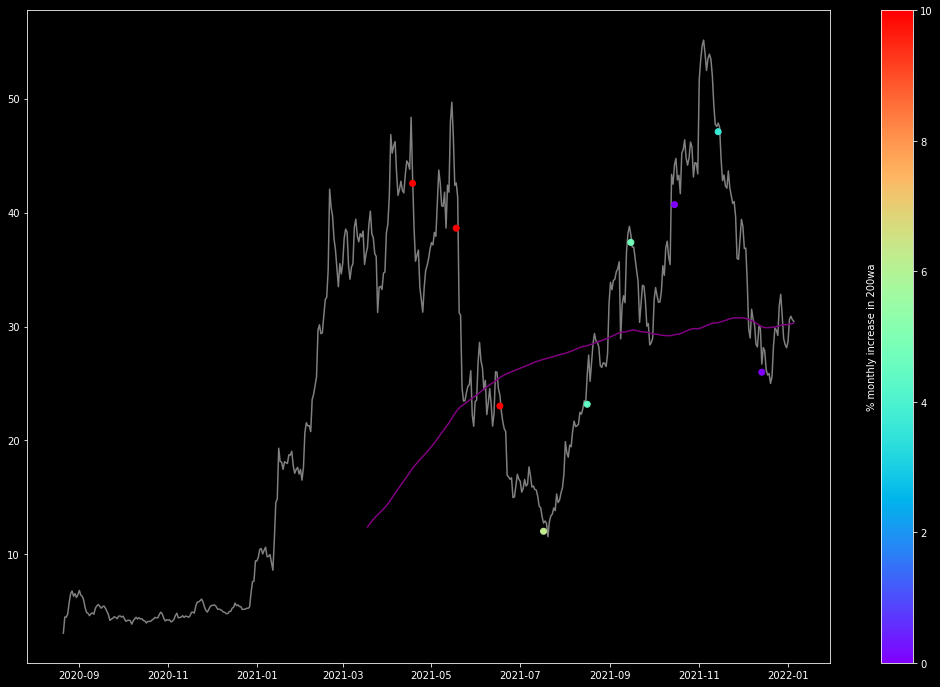

In [21]:
df['200w_moving_average'] = df['High'].rolling(window = 210).mean()

dates = pd.to_datetime(df['Date'])
plt.rcParams['figure.figsize'] = [18, 12]
plt.style.use("dark_background")
monthly = df[::30]
distance = monthly['200w_moving_average'].pct_change() * 100
# plt.semilogy(dates, df['High'], color="gray", zorder=1);
# plt.semilogy(dates, df['200w_moving_average'], color="purple", zorder=2);

plt.plot(dates, df['High'], color="gray", zorder=1);
plt.plot(dates, df['200w_moving_average'], color="purple", zorder=2);
plt.scatter(monthly['Date'], monthly['Open'], c=distance, cmap='rainbow', vmin=0, vmax=10, zorder=3)

cbar = plt.colorbar()
cbar.set_label("% monthly increase in 200wa")
cbar.ax.yaxis.set_label_position("left")

In [22]:
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average
0,DOT,2020-08-21,3.09,2.73,2.90,2.88,NaN
1,DOT,2020-08-22,4.51,2.82,2.88,4.48,NaN
2,DOT,2020-08-23,4.49,3.72,4.49,3.97,NaN
3,DOT,2020-08-24,4.78,3.81,3.99,4.60,NaN
4,DOT,2020-08-25,5.76,4.50,4.58,5.52,NaN
...,...,...,...,...,...,...,...
498,DOT,2022-01-01,28.65,26.66,26.66,28.61,30.172795
499,DOT,2022-01-02,30.63,27.83,28.62,29.70,30.202176
500,DOT,2022-01-03,30.90,28.63,29.71,30.09,30.228938
501,DOT,2022-01-04,30.60,28.67,30.10,28.69,30.268605


In [23]:
df['variacion_diaria'] = (df['High'] - df['Low']) / df['Low'] * 100
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,DOT,2020-08-21,3.09,2.73,2.90,2.88,NaN,13.186813
1,DOT,2020-08-22,4.51,2.82,2.88,4.48,NaN,59.929078
2,DOT,2020-08-23,4.49,3.72,4.49,3.97,NaN,20.698925
3,DOT,2020-08-24,4.78,3.81,3.99,4.60,NaN,25.459318
4,DOT,2020-08-25,5.76,4.50,4.58,5.52,NaN,28.000000
...,...,...,...,...,...,...,...,...
498,DOT,2022-01-01,28.65,26.66,26.66,28.61,30.172795,7.464366
499,DOT,2022-01-02,30.63,27.83,28.62,29.70,30.202176,10.061085
500,DOT,2022-01-03,30.90,28.63,29.71,30.09,30.228938,7.928746
501,DOT,2022-01-04,30.60,28.67,30.10,28.69,30.268605,6.731775


In [24]:
df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)

0      -0.689655
1      55.555556
2     -11.581292
3      15.288221
4      20.524017
         ...    
498     7.314329
499     3.773585
500     1.279031
501    -4.684385
502    -3.729522
Length: 503, dtype: float64

In [25]:
df['variacion_diaria'] = df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,DOT,2020-08-21,3.09,2.73,2.90,2.88,NaN,-0.689655
1,DOT,2020-08-22,4.51,2.82,2.88,4.48,NaN,55.555556
2,DOT,2020-08-23,4.49,3.72,4.49,3.97,NaN,-11.581292
3,DOT,2020-08-24,4.78,3.81,3.99,4.60,NaN,15.288221
4,DOT,2020-08-25,5.76,4.50,4.58,5.52,NaN,20.524017
...,...,...,...,...,...,...,...,...
498,DOT,2022-01-01,28.65,26.66,26.66,28.61,30.172795,7.314329
499,DOT,2022-01-02,30.63,27.83,28.62,29.70,30.202176,3.773585
500,DOT,2022-01-03,30.90,28.63,29.71,30.09,30.228938,1.279031
501,DOT,2022-01-04,30.60,28.67,30.10,28.69,30.268605,-4.684385


<AxesSubplot:>

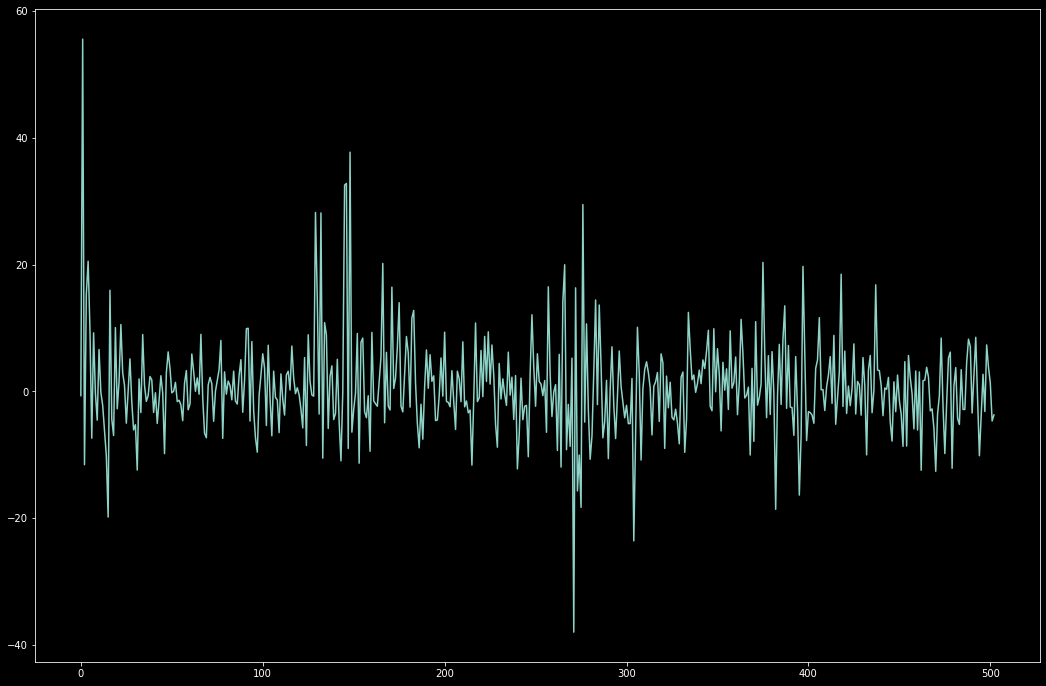

In [26]:
df['variacion_diaria'].plot()

In [27]:
for i in distance:
    print(i)

nan
nan
nan
nan
nan
nan
nan
nan
39.63268504882016
28.31710121035973
13.238979490928692
6.2705165812042996
4.427578548800115
4.728196664087303
-1.295902674120808
3.6475061981905865
-1.1392808727932136
